<a href="https://colab.research.google.com/github/nizardbsk/pl_pytorch_tutorial/blob/main/13_feed_forward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MNIST
# DataLoader , Transformation
# Multi layer NN , Act function
# Loss and Optimizer
# Training Loop (batch training)
# Model evaluation
# GPU support

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
input_size = 784 #28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
lr = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

examples = iter(train_loader)
samples,labels = next(examples)
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [13]:
print(train_loader)

AttributeError: ignored

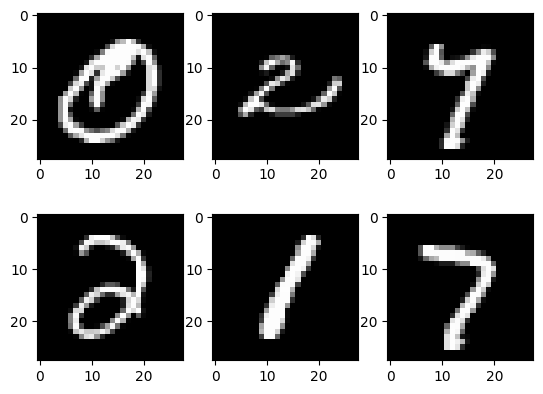

In [5]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [8]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [9]:
model = NeuralNet(input_size,hidden_size,num_classes)

In [10]:
# loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=lr)


In [15]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    # 100,1,28,28
    # 100,784
    images = images.reshape(-1,28*28)

    #forward
    outputs = model(images)
    loss = criterion(outputs,labels)

    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)% 100 ==0:
      print(f'epoch {epoch+1}/{num_epochs} , step {i+1}:/{n_total_steps},loss = {loss.item():.4f}')

# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images,labels in test_loader :
    images = images.reshape(-1,28*28)
    outputs = model(images)

    # value,index
    _,predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()
  acc = 100.0 * n_correct/n_samples
  print(f'accuracy =  {acc}')

epoch 1/2 , step 100:/600,loss = 0.1796
epoch 1/2 , step 200:/600,loss = 0.1177
epoch 1/2 , step 300:/600,loss = 0.0605
epoch 1/2 , step 400:/600,loss = 0.1234
epoch 1/2 , step 500:/600,loss = 0.0924
epoch 1/2 , step 600:/600,loss = 0.0601
epoch 2/2 , step 100:/600,loss = 0.0767
epoch 2/2 , step 200:/600,loss = 0.0888
epoch 2/2 , step 300:/600,loss = 0.1061
epoch 2/2 , step 400:/600,loss = 0.0885
epoch 2/2 , step 500:/600,loss = 0.1835
epoch 2/2 , step 600:/600,loss = 0.0421
accuracy =  96.65
